# Self-supervised learning by predicting image rotations

## Configuration

In [1]:
### Code importation

%run ../__init__.py
%run ../data.py

print(f"Using {device} device")

Using cuda:0 device


In [2]:
# Check the version of Pytorch

print(f"Pytorch version : {torch.__version__}")

Pytorch version: 2.0.0


## Importation & preprocessing

https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST

In [3]:
# MNIST Importation

train_data, test_data = load_mnist()

**To improve the quality of our images, we propose the following preprocessing :**

In [4]:
%%time

### Cleared MNIST Importation
traindata_cleared, testdata_cleared = load_mnist(True)

CPU times: total: 15.6 ms
Wall time: 30.1 ms


In [5]:
# Verify the normalization

list_img = [traindata_cleared[i][0] for i in range(len(traindata_cleared))]
list_img.extend([testdata_cleared[i][0] for i in range(len(testdata_cleared))])
list_img = torch.vstack((list_img))

print("Pixels mean in the original dataset :", list_img.mean(), 
      "\nPixels standard-deviation in the original dataset :", list_img.std())

Pixels mean in the original dataset : tensor(0.1700) 
Pixels standard-deviation in the original dataset : tensor(0.3757)


**The goal is to build models with (only black and white) images as you can see in the example below :**

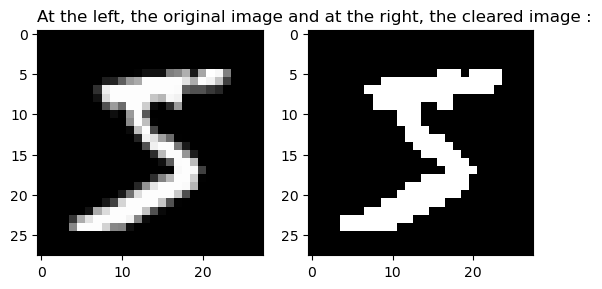

In [6]:
# Quality difference for an image

plt.subplot(1, 2, 1)
plt.imshow(train_data[0][0].view(28, 28), cmap = "gray")
plt.title("At the left, the original image and at the right, the cleared image :", loc = "left")
plt.subplot(1, 2, 2)
plt.imshow(traindata_cleared[0][0].view(28, 28), cmap = "gray")

plt.show()

**Our trick seems better than doing it by our own hands as proven below :**

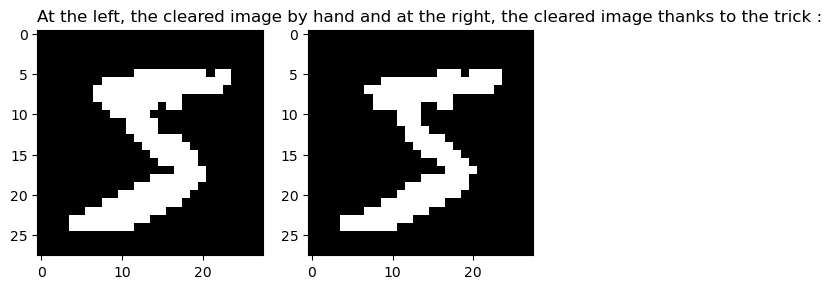

In [7]:
# Quality difference for an image (compared to if we did it by hand)

plt.subplot(1, 2, 1)
plt.imshow(torch.where(np.abs(train_data[0][0])==1, 0., 1.).view(28, 28), cmap = "gray")
plt.title("At the left, the cleared image by hand and at the right, the cleared image thanks to the trick :",
          loc = "left")
plt.subplot(1, 2, 2)
plt.imshow(traindata_cleared[0][0].view(28, 28), cmap = "gray")

plt.show()

## Feature extraction

**To create a baseline, we will consider feature extraction that might be powerful (for each image) :**

- **Histogram of projections on x-axis (number of black pixels per column)**
- **Likewise, histogram of projections on y-axis (number of black pixels per row)**
- **Left profiles (coordinate of the first transition white/ black starting from the left per row)**
- **Likewise, right profiles (coordinate of the first transition white/ black starting from the right per row)**

In [8]:
%%time

### Feature extraction
traindata_extracted = extract_mnist(traindata_cleared)


CPU times: total: 36.4 s
Wall time: 40.2 s


**For instance, let's look at the projections for a number :**

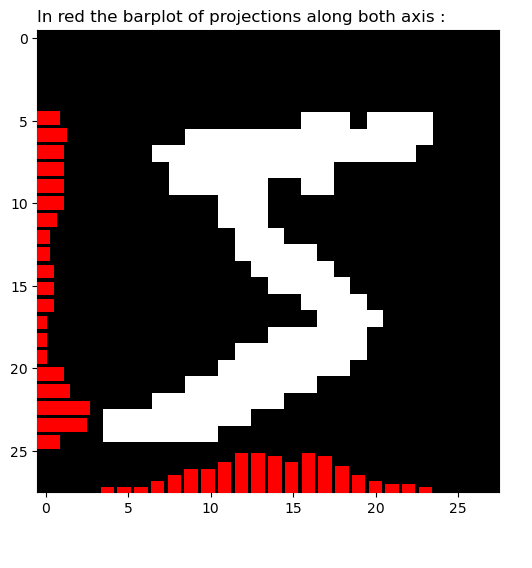

In [9]:
# A number with its projection along the axis of a 2D plane

fig, ax = plt.subplots(figsize = (8, 6))

ax.imshow(traindata_cleared[0][0].view(28, 28), cmap = "gray")
plt.title("In red the barplot of projections along both axis :", 
         loc = "left")

# Histogram along the x-axis
ax_histx = plt.axes([0.19, 0.108, 0.64, 0.07], frameon = False)
ax_histx.bar(np.arange(28), traindata_extracted[0][0][:28], color = 'red')
ax_histx.set_xticks([])
ax_histx.set_yticks([])

# Istogram along the y-axis
ax_histy = plt.axes([0.223, 0, 0.07, 0.87], frameon = False)
ax_histy.barh(np.arange(28), traindata_extracted[0][0][28:56], color = 'red')
ax_histy.set_xticks([])
ax_histy.set_yticks([])

plt.show()

## Data augmentation

**The constraint of the project is to work with a small dataset. Thus, in order to increase our models power, we could consider data augmentation (thanks to some image rotations, translations, homothety and distortion) :**

In [10]:
# Reduction of the dataset size

traindata_reduced = reduce_mnist(traindata_cleared)

**So here are the remaining labels chosen randomly :**

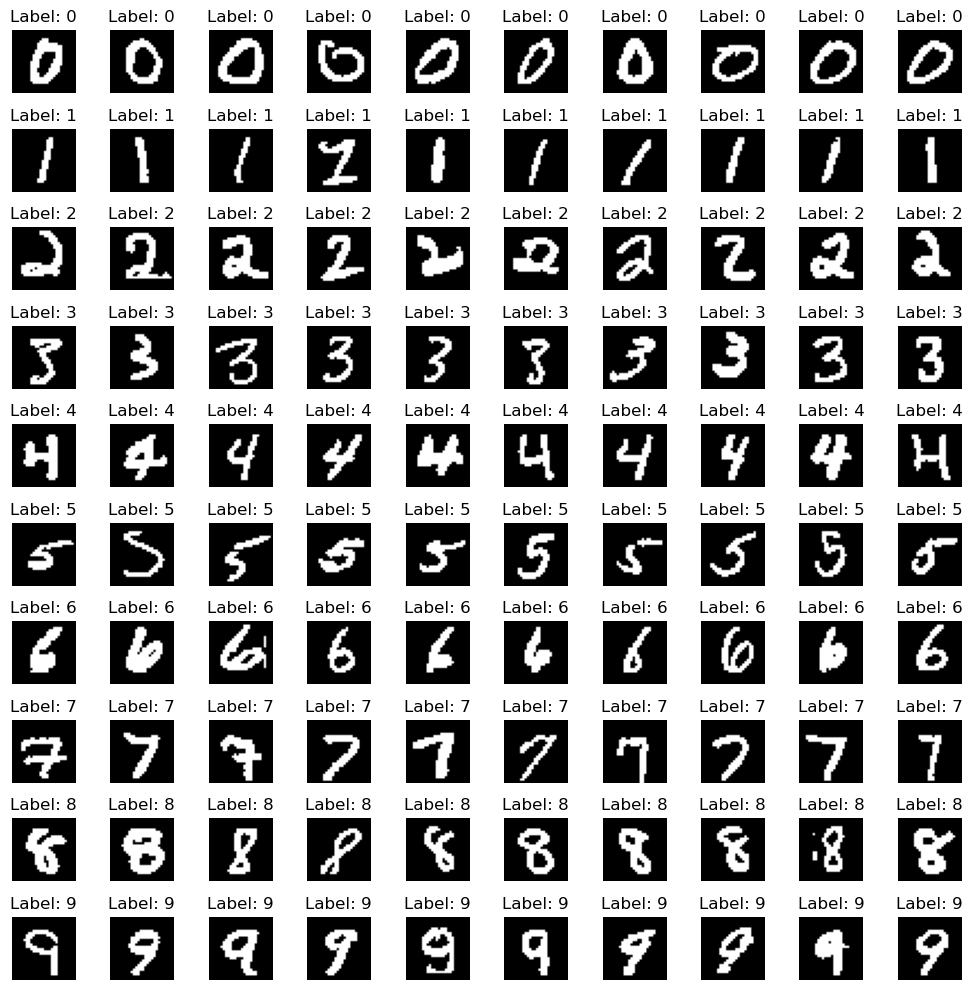

In [11]:
# Plot of the reduced dataset

fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize = (10, 10))

for i in range(10) :
    for j in range(10) :
        img, label = traindata_reduced[i*10 + j]
        ax[i, j].imshow(img.squeeze(), cmap = 'gray')
        ax[i, j].axis('off')
        ax[i, j].set_title('Label: {}'.format(label))
        
plt.tight_layout()
plt.show()

**Now we will propose different data augmentation procedures :**

In [12]:
%%time

# Data augmentation (10 image generated for each original image of the dataset)
traindata_extended = extend_mnist(traindata_reduced)

CPU times: total: 406 ms
Wall time: 439 ms


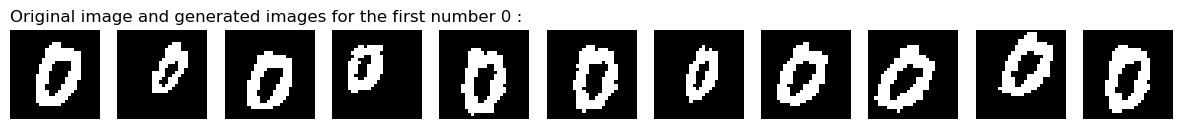

In [13]:
# Plot of the generated images for the first number 0

fig, ax = plt.subplots(nrows = 1, ncols = 11, figsize = (15, 1.5))

for i in range(11) :
    img, label = traindata_extended[i]
    ax[i].imshow(img.squeeze(), cmap = 'gray')
    ax[i].axis('off')
    if (i==0) :
        ax[i].set_title('Original image and generated images for the first number 0 :', loc = 'left')
        
plt.show()